**Problem Statement**
Vehicles must accurately recognize traffic signs in real time to ensure safe and efficient navigation. Challenges such as varying lighting conditions, occlusions, and different camera angles make traditional approaches less effective. Neural networks help overcome these challenges by learning patterns from diverse datasets.

In [16]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [17]:
import os

DATA_DIR = r"C:\GTSRB\train"  # Update this path

if not os.path.exists(DATA_DIR):
    print("Dataset path is incorrect. Please check the location.")
else:
    print("Dataset path found. Listing classes:")
    print(os.listdir(DATA_DIR))


Dataset path found. Listing classes:
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [18]:
DATASET_DIR = r"C:\GTSRB\train"  # Replace with your actual path

IMG_SIZE = 32  # Resize images to 32x32

data = []
labels = []
num_classes = 43  # GTSRB has 43 classes

# Read images from each class directory
for class_id in range(num_classes):
    class_dir = os.path.join(DATASET_DIR, str(class_id))
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        data.append(img)
        labels.append(class_id)

# Convert to numpy arrays
data = np.array(data) / 255.0  # Normalize
labels = np.array(labels)

# One-hot encode labels
labels = to_categorical(labels, num_classes)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


In [19]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

IMG_SIZE = 32
NUM_CLASSES = 43

model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),  # Explicit input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,627 (920.42 KB)

 Trainable params: 235,627 (920.42 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.3173 - loss: 2.5066 - val_accuracy: 0.9243 - val_loss: 0.2902
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8965 - loss: 0.3374 - val_accuracy: 0.9728 - val_loss: 0.1036
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9557 - loss: 0.1516 - val_accuracy: 0.9800 - val_loss: 0.0776
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9704 - loss: 0.1049 - val_accuracy: 0.9821 - val_loss: 0.0621
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9758 - loss: 0.0788 - val_accuracy: 0.9876 - val_loss: 0.0408
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9825 - loss: 0.0559 - val_accuracy: 0.9851 - val_loss: 0.0616
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9842 - loss: 0.0497 - val_accuracy: 0.9879 - val_loss: 0.0438
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9868 - loss: 0.0425 - 

In [21]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {test_acc * 100:.2f}%")

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9941 - loss: 0.0238
Validation Accuracy: 99.53%


In [8]:
model.save("traffic_sign_model.h5")

In [9]:
model.save("traffic_sign_model.keras")

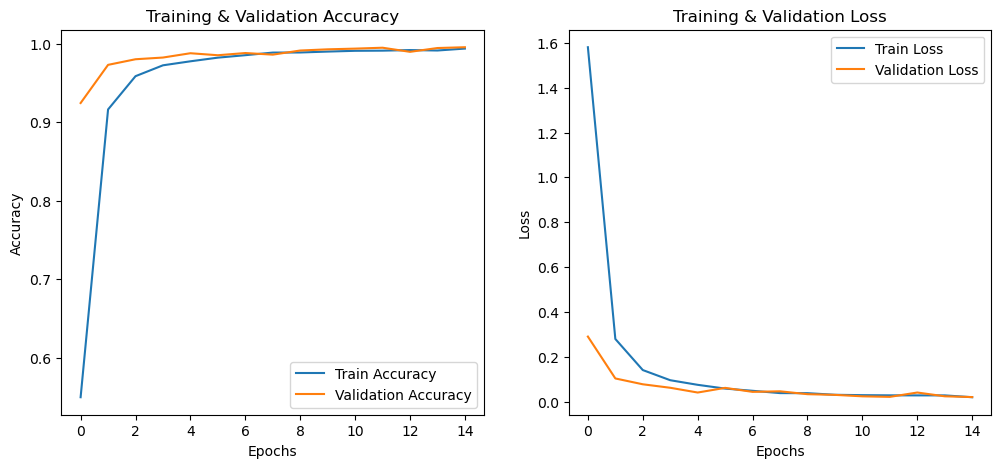

In [22]:
# Plot Training & Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


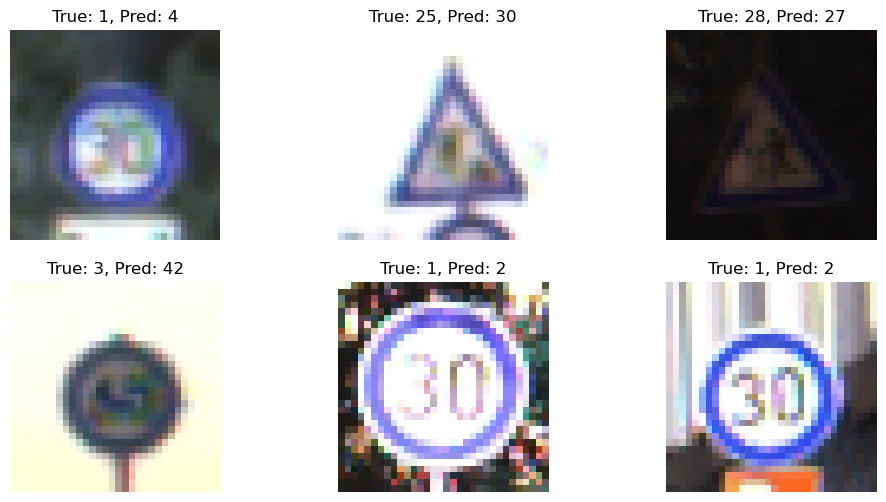

In [23]:
import numpy as np

# Get model predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Get misclassified indexes
misclassified_idx = np.where(y_pred_classes != y_true_classes)[0]

# Show misclassified images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_idx[:6]):  # Show first 6
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_val[idx])
    plt.title(f"True: {y_true_classes[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')

plt.show()


In [24]:
import pandas as pd

test_csv_path = "C:/GTSRB/test.csv"

try:
    test_data = pd.read_csv(test_csv_path)
    print("Test data loaded successfully!")
    print(test_data.head())  # Show the first few rows
except Exception as e:
    print(f"Error loading test.csv: {e}")


Test data loaded successfully!
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png


In [25]:
print("Columns in test.csv:", test_data.columns)

Columns in test.csv: Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')


In [26]:
class_labels = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}
print("Class labels loaded:", len(class_labels))

Class labels loaded: 43


In [27]:
import numpy as np

img = cv2.imread(img_path)
img = cv2.resize(img, (32, 32))

img = img / 255.0
img = np.expand_dims(img, axis=0)  # Add batch dimension

pred = model.predict(img)

if pred is None:
    print("Model did not return any output!")
else:
    print(f" Model output shape: {pred.shape}")
    predicted_class_id = np.argmax(pred)
    print(f" Predicted Class ID: {predicted_class_id}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
 Model output shape: (1, 43)
 Predicted Class ID: 42


In [28]:
def predict_traffic_sign(img_path, model, class_labels, test_data):
    print(f"🔍 Processing image: {img_path}")

    # Read and preprocess the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image {img_path}")
        return
    
    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Get the predicted class
    pred = model.predict(img)
    predicted_class_id = np.argmax(pred)  # Predicted class
    predicted_sign_name = class_labels.get(predicted_class_id, "Unknown Sign")

    print(f"Model prediction completed! Class ID: {predicted_class_id}, Sign: {predicted_sign_name}")

    # Extract only the filename from img_path (e.g., "00010.png")
    img_filename = os.path.basename(img_path)

    # Find the actual class from test.csv
    actual_row = test_data[test_data["Path"].str.contains(img_filename, case=False, na=False)]

    if not actual_row.empty:
        actual_class_id = int(actual_row["ClassId"].values[0])  # Convert NumPy value to int
        actual_sign_name = class_labels.get(actual_class_id, "Unknown Sign")
        print(f"Found actual label: {actual_class_id} ({actual_sign_name})")
    else:
        actual_class_id, actual_sign_name = "Unknown", "Unknown"
        print(f" Warning: Could not find actual label for {img_filename}")

    # Display image with prediction and actual label
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {predicted_sign_name}\nActual: {actual_sign_name}")
    plt.axis('off')
    plt.show()

    # Print final result
    print(f"🔹 Predicted: {predicted_class_id} ({predicted_sign_name})")
    print(f"🔹 Actual: {actual_class_id} ({actual_sign_name})")


🔍 Processing image: C:/GTSRB/Test/00005.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Model prediction completed! Class ID: 38, Sign: Keep right
Found actual label: 38 (Keep right)


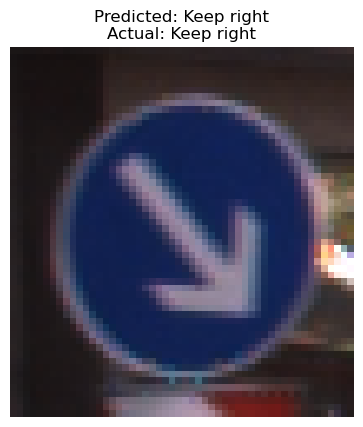

🔹 Predicted: 38 (Keep right)
🔹 Actual: 38 (Keep right)


In [29]:
predict_traffic_sign("C:/GTSRB/Test/00005.png", model, class_labels, test_data)

In [32]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model

# Replace with the actual path to your trained model
MODEL_PATH = "traffic_sign_model.h5"

# Check if the model file exists
if not os.path.exists(MODEL_PATH):
    print(f"Error: Model file '{MODEL_PATH}' not found. Check the file path.")
    exit()

# Load the trained model
model = load_model(MODEL_PATH)

# Define class labels for traffic signs
class_labels = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}
print("Class labels loaded:", len(class_labels))

# Open webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture image")
        break

    # Get frame dimensions
    h, w, _ = frame.shape

    # Define the bounding box (ROI) in the center
    box_size = 200  # Size of the detection area
    start_x = (w - box_size) // 2
    start_y = (h - box_size) // 2
    end_x = start_x + box_size
    end_y = start_y + box_size

    # Extract the region of interest (ROI)
    roi = frame[start_y:end_y, start_x:end_x]

    # Resize and preprocess ROI for model prediction
    img = cv2.resize(roi, (32, 32))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict traffic sign
    pred = model.predict(img)
    class_id = np.argmax(pred)
    predicted_class_name = class_labels.get(class_id, "Unknown")

    # Draw bounding box on the frame
    cv2.rectangle(frame, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

    # Display prediction text
    cv2.putText(frame, f"Prediction: {predicted_class_name}",
                (start_x, start_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)

    # Show webcam frame
    cv2.imshow("Traffic Sign Detection", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


Class labels loaded: 43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

In [2]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model

# Replace with the actual path to your model file
MODEL_PATH = "traffic_sign_model.h5"

# Check if the model file exists before loading
if not os.path.exists(MODEL_PATH):
    print(f"Error: Model file '{MODEL_PATH}' not found. Check the file path.")
    exit()

# Load the trained model
model = load_model(MODEL_PATH)

# Define traffic sign class labels (modify according to your dataset)
class_labels = {
    0: "Speed Limit 20 km/h", 1: "Speed Limit 30 km/h", 2: "Speed Limit 50 km/h",
    3: "Speed Limit 60 km/h", 4: "Speed Limit 70 km/h", 5: "Speed Limit 80 km/h",
    6: "Speed Limit 100 km/h", 7: "Speed Limit 120 km/h", 8: "No Passing",
    9: "No Passing for Vehicles >3.5T", 10: "Right of Way", 11: "Priority Road",
    12: "Yield", 13: "Stop", 14: "No Vehicles", 15: "No Vehicles >3.5T",
    16: "No Entry", 17: "General Caution", 18: "Dangerous Curve Left",
    19: "Dangerous Curve Right", 20: "Double Curve", 21: "Bumpy Road",
    22: "Slippery Road", 23: "Road Narrows Right", 24: "Road Work",
    25: "Traffic Signals", 26: "Pedestrians", 27: "Children Crossing",
    28: "Bicycles Crossing", 29: "Snow Danger", 30: "Animals Crossing",
    31: "End of Speed Limit", 32: "Turn Right Ahead", 33: "Turn Left Ahead",
    34: "Ahead Only", 35: "Go Right or Straight", 36: "Go Left or Straight",
    37: "Keep Right", 38: "Keep Left", 39: "Roundabout", 40: "End of No Passing",
    41: "End of No Passing for Vehicles >3.5T"
}

# Open webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture image")
        break

    # Resize and preprocess frame for the model
    img = cv2.resize(frame, (32, 32))  # Resize to match model input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict traffic sign
    pred = model.predict(img)
    class_id = np.argmax(pred)

    # Get class name from dictionary (default to "Unknown" if not found)
    predicted_class_name = class_labels.get(class_id, "Unknown")

    # Overlay prediction text on frame
    cv2.putText(frame, f"Predicted: {class_id} ({predicted_class_name})",
                (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

    # Show webcam frame
    cv2.imshow("Traffic Sign Detection", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
